# Analyse Historical Inventory Revenue Data and Create a Dashboard

## Question 1 - Extraction of Tesla Stock Data Using yfinance

In [1]:
import yfinance as yf
import matplotlib
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
print("Libraries successfully loaded!")

Libraries successfully loaded!


In [2]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

In [3]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extraction of Tesla Revenue Data Using Webscraping

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
table = soup.find("table")
table_headers = table.find_all('th')
for header in table_headers:
    print(header.text.strip())
table_body = table.find('tbody')
rows = table_body.find_all('tr')
for row in rows:
    columns = row.find_all('td')
    if len(columns) > 1:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip()
        temp_df = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
        tesla_revenue = pd.concat([tesla_revenue, temp_df], ignore_index=True)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r'[,\$]', '', regex=True)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].astype(float)
def fix_date_format(date_str):
    if len(date_str) == 4:
        return f"Jan 01, {date_str}"
    return date_str
tesla_revenue['Date'] = tesla_revenue['Date'].apply(fix_date_format)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'], errors='coerce')
tesla_revenue

Tesla Annual Revenue(Millions of US $)


,Date,Revenue
0,2021-01-01,53823.0
1,2020-01-01,31536.0
2,2019-01-01,24578.0
3,2018-01-01,21461.0
4,2017-01-01,11759.0
5,2016-01-01,7000.0
6,2015-01-01,4046.0
7,2014-01-01,3198.0
8,2013-01-01,2013.0
9,2012-01-01,413.0


## Question 3 - Extraction of GameStop Stock Data Using yfinance

In [5]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
5730,2024-11-18 00:00:00-05:00,26.650000,27.160000,25.850000,26.440001,8541600,0.0,0.0
5731,2024-11-19 00:00:00-05:00,25.889999,27.600000,25.709999,27.570000,8698600,0.0,0.0
5732,2024-11-20 00:00:00-05:00,27.260000,29.799999,27.260000,28.450001,22089700,0.0,0.0
5733,2024-11-21 00:00:00-05:00,29.090000,29.170000,27.180000,27.820000,10587200,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [6]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data2 = requests.get(url2).text
soup2 = BeautifulSoup(html_data2, "html.parser")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
table2 = soup2.find("table")
table_headers2 = table2.find_all('th')
for header2 in table_headers2:
    print(header2.text.strip())
table_body2 = table2.find('tbody')
rows2 = table_body2.find_all('tr')
for row2 in rows2:
    columns2 = row2.find_all('td')
    if len(columns2) > 1:
        date2 = columns2[0].text.strip()
        revenue2 = columns2[1].text.strip()
        temp_df2 = pd.DataFrame({'Date': [date2], 'Revenue': [revenue2]})
        gme_revenue = pd.concat([gme_revenue, temp_df2], ignore_index=True)
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(r'[,\$]', '', regex=True)
gme_revenue["Revenue"] = gme_revenue['Revenue'].astype(float)
gme_revenue['Date'] = gme_revenue['Date'].apply(fix_date_format)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'], errors='coerce')
gme_revenue

GameStop Annual Revenue(Millions of US $)


,Date,Revenue
0,2020-01-01,6466.0
1,2019-01-01,8285.0
2,2018-01-01,8547.0
3,2017-01-01,7965.0
4,2016-01-01,9364.0
5,2015-01-01,9296.0
6,2014-01-01,9040.0
7,2013-01-01,8887.0
8,2012-01-01,9551.0
9,2011-01-01,9474.0


## Question 5 - Tesla Stock and Revenue Dashboard

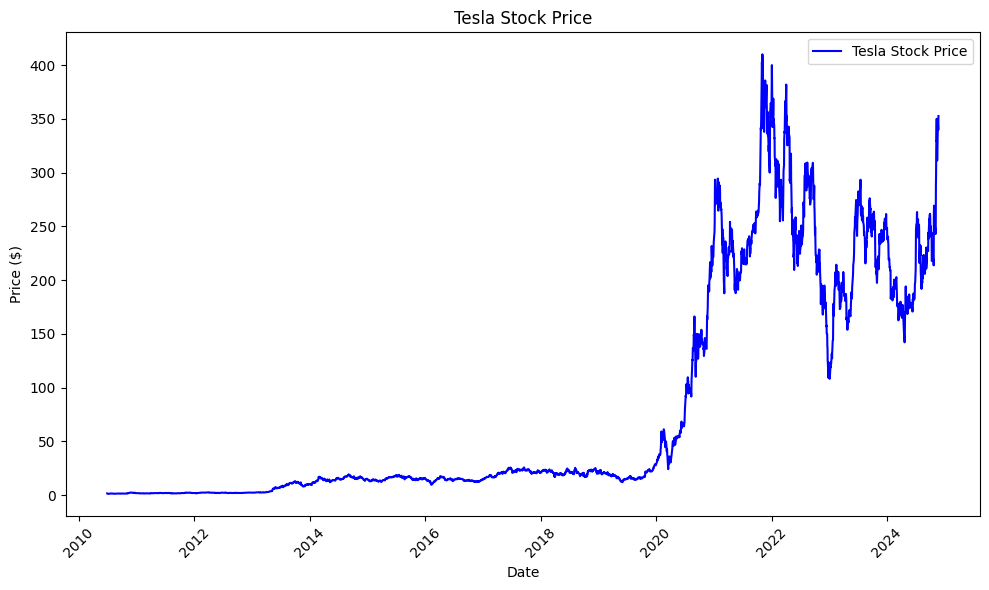

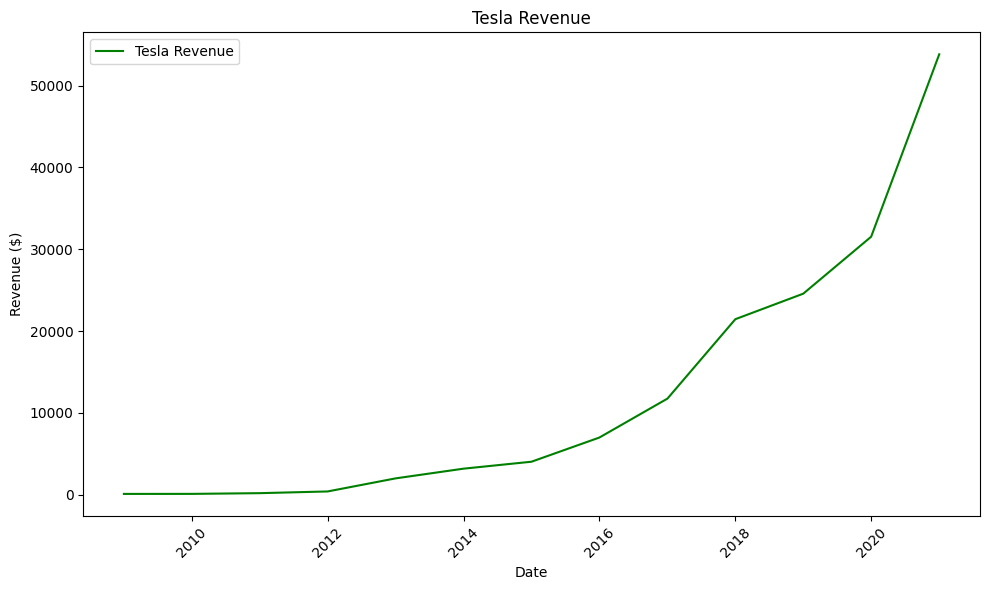

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Tesla Stock Price', color='blue')
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], label='Tesla Revenue', color='green')
plt.title('Tesla Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Question 6 - GameStop Inventory and Revenue Dashboard

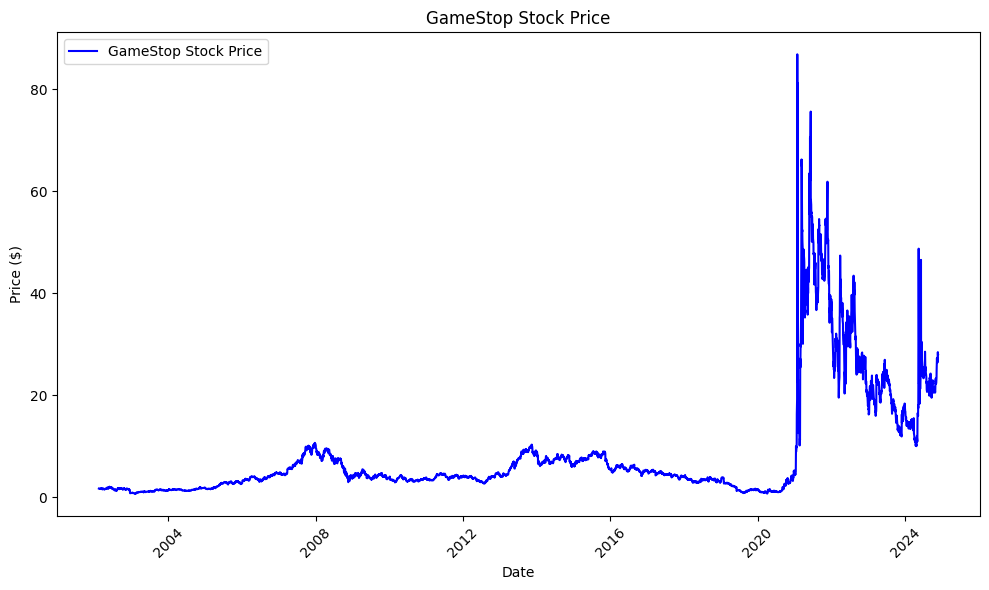

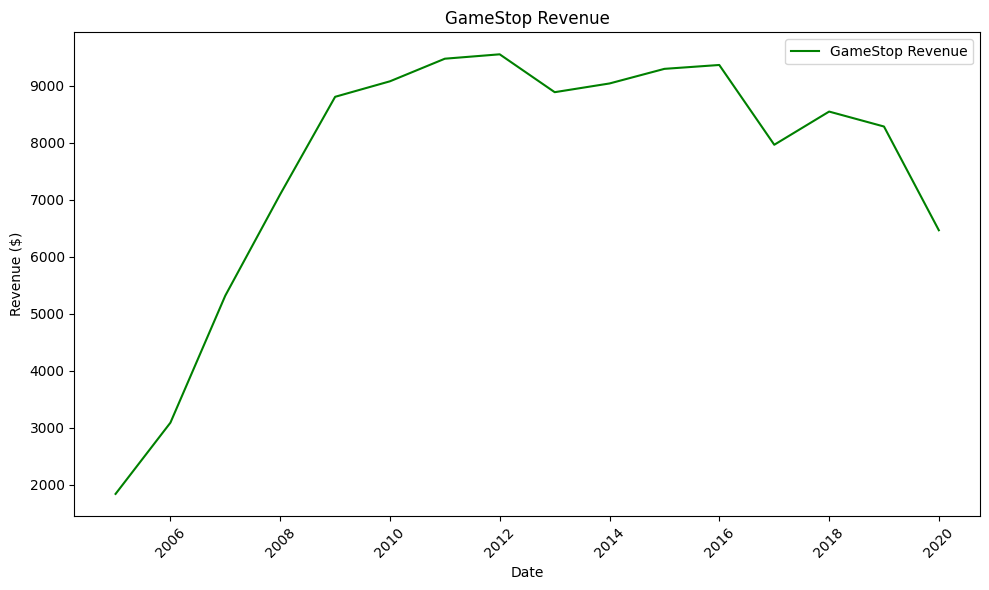

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(gme_data['Date'], gme_data['Close'], label='GameStop Stock Price', color='blue')
plt.title('GameStop Stock Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], label='GameStop Revenue', color='green')
plt.title('GameStop Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()